# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 13 years ago. So if today is 2022.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [3]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 

Downloading: 100%|██████████| 20/20 [00:02<00:00,  6.86rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,36010,99999,1929,11,14,42.000000,4,40.200001,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
1,37950,99999,1929,12,28,39.700001,4,38.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,38560,99999,1930,6,29,58.500000,4,NaN,NaN,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
3,39730,99999,1930,5,26,54.000000,4,49.000000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,36010,99999,1930,4,28,53.700001,4,NaN,NaN,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,39530,99999,1931,3,18,50.799999,4,47.400002,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
6,38640,99999,1931,5,17,51.500000,4,46.900002,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1931,9,4,79.900002,24,39.000000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
8,726810,24131,1931,12,2,18.500000,24,13.800000,8.0,NaN,...,NaN,None,0.0,NaN,True,True,True,True,True,True
9,726810,24131,1931,11,8,54.799999,24,32.200001,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False


## Part 1

# Welcome to challenge's solution!

Hi! In this challenge I aim to solve the following question:

**Will it snow tomorrow 13 years ago?**

In order to answer this question, I will be using the GSOD public dataset, which contains different variables related with weather. This is a time series dataset and the the target variable in this case is a boolean categorial variable. 

For this I will be using 2 models, with 3 different scenarios:
1. Logistic Regression.
2. Logistic Regression - Hyperparameter optimization with GridSearch
3. XGBoost - Hyperparameter optimization with GridSearch

In [ ]:
## First with need to install the requirements in the environment
##pip install -r requirements.txt 

In [ ]:
#After register the IPython Magics for Bigquery with "%load", now we just need to reload them
%reload_ext google.cloud.bigquery

In [5]:
## We import all the libraries
from google.cloud import bigquery
client = bigquery.Client()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import warnings
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
import xgboost as xgb

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

- I start querying the data through Big Query and then the query is converted into a dataframe in order to change the date format with Pandas. 
	> Nonetheless converting to dataframe requires more computational time.

In [6]:
sql = """
SELECT
CONCAT(year, month, day) AS date,
*
FROM `bigquery-public-data.samples.gsod` AS table
WHERE year BETWEEN 2005 AND 2009
AND station_number BETWEEN 725300 AND 726300
"""
df = client.query(sql).to_dataframe()
df.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005710,725869,99999,2005,7,10,68.400002,5,50.700001,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,2005211,725835,99999,2005,2,11,22.600000,5,16.500000,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False
2,20051224,725868,99999,2005,12,24,28.799999,5,27.700001,5.0,...,NaN,None,0.0,1.2,False,False,False,False,False,False
3,2005630,725467,99999,2005,6,30,83.800003,5,71.599998,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,2005324,725488,99999,2005,3,24,35.900002,6,26.200001,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

# Data First Examination
### We need to check: 
1. Shape of the df
2. Datatype of the features
3. Missing values
4. Categorical and numerical variables
5. Numerical variables with few variance
6. Useful variables

In [9]:
#Structure of the date, number of rows and features
print(df.shape)
target = df["snow"]

(377784, 32)


> We define our target variable: "snow".

In [8]:
#Datatype of features, df'shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377784 entries, 0 to 377783
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   date                                377784 non-null  object 
 1   station_number                      377784 non-null  int64  
 2   wban_number                         377784 non-null  int64  
 3   year                                377784 non-null  int64  
 4   month                               377784 non-null  int64  
 5   day                                 377784 non-null  int64  
 6   mean_temp                           377784 non-null  float64
 7   num_mean_temp_samples               377784 non-null  int64  
 8   mean_dew_point                      377626 non-null  float64
 9   num_mean_dew_point_samples          377626 non-null  float64
 10  mean_sealevel_pressure              231937 non-null  float64
 11  num_mean_sealevel_pressure

We also need to examinate if there are features with so low variance, as can be problematic for the prediction. In this case, multiple features has only 2 unique values, but this is normal since these are categorical variables.

In [362]:
 #Count the number of unique values per feature
 print(df.nunique().sort_values())

min_temperature_explicit                 0
min_temperature                          0
tornado                                  2
hail                                     2
snow                                     2
rain                                     2
fog                                      2
max_temperature_explicit                 2
thunder                                  2
year                                     5
month                                   12
num_mean_wind_speed_samples             21
num_mean_station_pressure_samples       21
num_mean_visibility_samples             21
num_mean_sealevel_pressure_samples      21
num_mean_dew_point_samples              21
num_mean_temp_samples                   21
day                                     31
snow_depth                              58
max_gust_wind_speed                    105
max_sustained_wind_speed               108
wban_number                            204
station_number                         217
total_preci

In [363]:
#Calculate percentage of missing values per feature
percentagenull = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([percentagenull], axis=1, keys = ['Percent'])
missing_data.head(10)

,Percent
min_temperature,1.000000
min_temperature_explicit,1.000000
snow_depth,0.982278
num_mean_station_pressure_samples,0.976931
mean_station_pressure,0.976931
mean_sealevel_pressure,0.386059
num_mean_sealevel_pressure_samples,0.386059
max_gust_wind_speed,0.346492
total_precipitation,0.120026
mean_visibility,0.025620


## Cleaning function

Here I use a function that will preprocess the dataframe and will return a clean dataframe.
- This function:
	- Converts boolean variables in int, that is from False/True to 0/1.

	- Changes date format in '%Y%m%d.

	- Removes features where the percentage of missing values is > 50%.

	- Removes columns that the user establish.
	
	- Removes duplicated rows.

	- Set the date as index (will be useful to make some graphs).

	- Replaces missing values with the calculated mean.

In [364]:
def clean_dataframe(dataframe, target, cols_remove):
    """  Return a Pandas dataframe. \n
    PARAMETERS:\n
    dataframe: Pandas dataframe .\n
    target: variable we want to predict. 
    cols_remove: list of columns that we examinated in advance and infer won't be useful. \n
    RETURN:\n
    dataframe: Pandas dataframe  
    """
    table = dataframe  
    table[target] = table['snow'] 
    u = table.select_dtypes(bool)
    table[u.columns] = u.astype(int)
    #table['snow'] = table[target].astype(int) 
    table['date'] = pd.to_datetime(table['date'], format='%Y%m%d')
    table = table.sort_values(by = ['date'])
    percentagenull = (table.isnull().sum()/table.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([percentagenull], axis=1, keys = ['Percent'])
    table = table.drop(missing_data[missing_data['Percent']>0.5].index,axis = 1,inplace = False)
    #table = table.dropna(axis=1, how='all')
    table = table.drop(cols_remove, axis=1)
    table= table.loc[~table.index.duplicated(), :] 
    table=table.set_index('date')
    table = table.fillna(table.mean(), inplace=False)
    return table 

In [365]:
##We call the function
clean_table = clean_dataframe(df, 'snow', ['num_mean_wind_speed_samples', 'num_mean_visibility_samples',
 'num_mean_sealevel_pressure_samples', 'num_mean_dew_point_samples', 'num_mean_temp_samples', 'max_temperature_explicit', "day", "year", "month", "wban_number"])

In [367]:
# Examine the new cleaned dataframe 
clean_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 377784 entries, 2005-01-01 to 2009-12-31
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   station_number            377784 non-null  int64  
 1   mean_temp                 377784 non-null  float64
 2   mean_dew_point            377784 non-null  float64
 3   mean_sealevel_pressure    377784 non-null  float64
 4   mean_visibility           377784 non-null  float64
 5   mean_wind_speed           377784 non-null  float64
 6   max_sustained_wind_speed  377784 non-null  float64
 7   max_gust_wind_speed       377784 non-null  float64
 8   max_temperature           377784 non-null  float64
 9   total_precipitation       377784 non-null  float64
 10  fog                       377784 non-null  int32  
 11  rain                      377784 non-null  int32  
 12  snow                      377784 non-null  int32  
 13  hail                      37

The cleaned dataframe have only 16 features now

## Plots

1.  I want to know the frequency of the target variable

c:\Users\murre\7Learnings\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Snow Frequency')

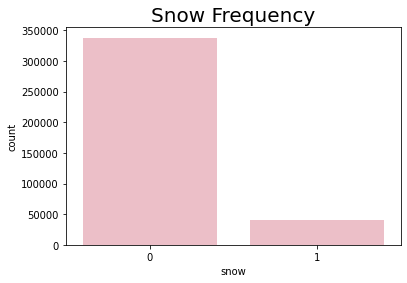

In [18]:
# Plotting compliance frequency per class
%matplotlib inline

sns.countplot(target, color='crimson', alpha=0.3).set_title("Snow Frequency", size=20)

 - The graph shows that the data is imbalanced, as most of the values are **False** .

2. In the next two graphs, I plot a numerical feature "average temperature", so I can get some insights about the data:
- Is the data stationary? 
- Have the data a seasonality component? 
- Is the mean/std constant?

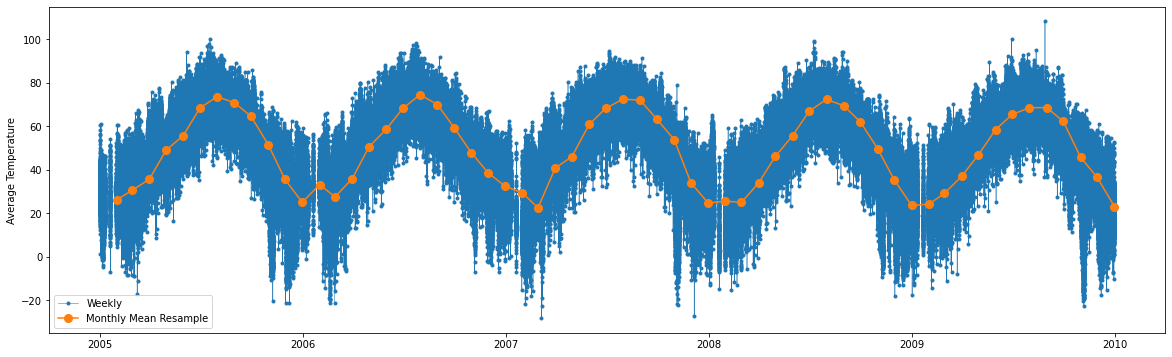

In [14]:
y = clean_table["mean_temp"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Average Temperature')
ax.legend();

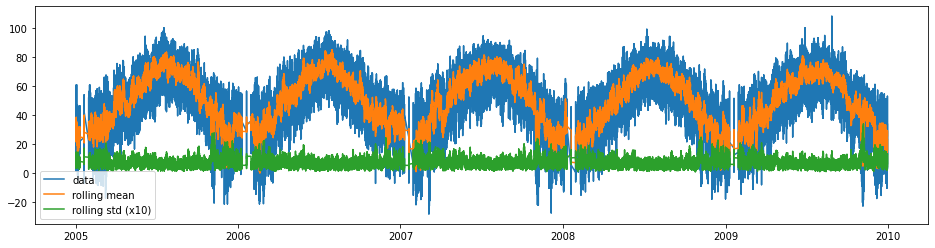

In [15]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'data')

- We can see that there is stational component and also that the mean and the standard deviation are constant, this shows the data is stationary. 

# Datasets Comparison
At this point, I tried to make some experiments with the "clean_table" I created and I got a red flag (below I will describe this); so I want to compare the cleaned dataset that I got with the clean dataset that was already provided in the repo for this challenge, so we can be sure everything is going well in order to make the predictions. I will call this last clean dataset: "weather".

In [12]:
#Load and examine the df structure
weather = pd.read_csv("coding_challenge.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15332 entries, 0 to 15331
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    15332 non-null  object 
 1   station_number          15332 non-null  int64  
 2   mean_temp               15332 non-null  float64
 3   mean_dew_point          15332 non-null  float64
 4   mean_sealevel_pressure  15332 non-null  float64
 5   mean_visibility         15332 non-null  float64
 6   mean_wind_speed         15332 non-null  float64
 7   max_temperature         15332 non-null  float64
 8   total_precipitation     15332 non-null  float64
 9   snow_depth              15332 non-null  float64
 10  fog                     15332 non-null  bool   
 11  snow                    15332 non-null  bool   
 12  hail                    15332 non-null  bool   
 13  thunder                 15332 non-null  bool   
dtypes: bool(4), float64(8), int64(1), obje

In [259]:
#First rows of this dataframe
weather.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,snow,hail,thunder
0,2006-01-24,725300,33.200001,26.799999,1008.500000,7.0,15.2,23.000000,0.0,1.20,False,False,False,False
1,2006-01-25,725300,33.299999,21.400000,1021.099976,10.0,14.0,28.900000,0.0,1.20,False,False,False,False
2,2006-01-26,725300,30.299999,19.700001,1031.400024,9.9,4.6,19.400000,0.0,2.66,False,False,False,False
3,2006-01-27,725300,39.900002,25.299999,1027.599976,10.0,10.7,35.599998,0.0,2.66,False,False,False,False
4,2006-01-28,725300,43.200001,33.799999,1019.900024,9.4,6.6,35.099998,0.0,2.66,False,False,False,False


In [260]:
#Columns of the dataframe
weather.columns

Index(['date', 'station_number', 'mean_temp', 'mean_dew_point',
       'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed',
       'max_temperature', 'total_precipitation', 'snow_depth', 'fog', 'snow',
       'hail', 'thunder'],
      dtype='object')

> **Note**: In a posterior stage I fitted a logit model and could calculate the features importance according to the model and I could determinate which features are important to get an accurate model, the selected are below:

In [261]:
weather = weather[['date', 'mean_dew_point',
       'mean_sealevel_pressure', 'mean_visibility', 'mean_wind_speed',
       'max_temperature', 'total_precipitation', 'snow_depth','snow']]

I want to check if in the "weather" dataset, the target variable "snow" is imbalanced:

In [13]:
##Calculate percentage of each unique value
weather["snow"].value_counts()/weather.shape[0]

False    0.90784
True     0.09216
Name: snow, dtype: float64

> When I want to make further experiments, such as creating a pivot table to group by "station number", I realize the "clean_date" frame has duplicates per each date (the target variable "snow" has both values 0 and 1 for each date **does not makes sense**), so I decide to explore with the "weather" dataframe (provided by the challenge repo) and looks more reasonable with only one value (no duplicated) per date. **I decide to go further with the weather dataset in the next step.**

In [369]:
#pivot = weather.reset_index()
pivottable = clean_table.pivot_table(index=["date", "snow"], columns="station_number", fill_value=0)
pivottable = pd.DataFrame(pivottable.to_records())
pivottable.head(10)

,date,snow,"('fog', 725300)","('fog', 725305)","('fog', 725314)","('fog', 725315)","('fog', 725316)","('fog', 725317)","('fog', 725320)","('fog', 725326)",...,"('total_precipitation', 726183)","('total_precipitation', 726184)","('total_precipitation', 726185)","('total_precipitation', 726190)","('total_precipitation', 726196)","('total_precipitation', 726223)","('total_precipitation', 726225)","('total_precipitation', 726227)","('total_precipitation', 726228)","('total_precipitation', 726284)"
0,2005-01-01,0,0,0,0,0,0,0,0,0,...,0.03,0.01,0.00,0.24,0.17,0.16,0.0,0.31,0.61,0.0
1,2005-01-01,1,0,0,0,1,1,1,1,0,...,0.00,0.00,0.04,0.00,0.00,0.00,0.0,0.00,0.00,0.0
2,2005-01-02,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
3,2005-01-02,1,1,1,0,1,1,1,1,0,...,0.00,0.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.0
4,2005-01-03,0,0,0,0,0,0,0,0,0,...,0.00,0.22,0.00,0.34,0.00,0.00,0.0,0.00,0.00,0.0
5,2005-01-03,1,1,0,0,0,0,1,1,0,...,0.16,0.00,0.41,0.00,0.28,0.32,0.0,0.44,0.29,0.0
6,2005-01-04,0,0,0,0,0,0,0,0,0,...,0.01,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
7,2005-01-04,1,1,1,0,1,1,1,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
8,2005-01-05,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
9,2005-01-05,1,1,1,0,1,1,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.0


In [42]:
#pivot = weather.reset_index()
pivottable = weather.pivot_table(index=["date", "snow"], columns="station_number", fill_value=0)
pivottable = pd.DataFrame(pivottable.to_records())
pivottable.head(10)

,date,snow,"('fog', 725300)","('fog', 725305)","('fog', 725314)","('fog', 725315)","('fog', 725316)","('fog', 725317)","('fog', 725320)","('fog', 725326)",...,"('total_precipitation', 725300)","('total_precipitation', 725305)","('total_precipitation', 725314)","('total_precipitation', 725315)","('total_precipitation', 725316)","('total_precipitation', 725317)","('total_precipitation', 725320)","('total_precipitation', 725326)","('total_precipitation', 725327)","('total_precipitation', 725330)"
0,2006-01-24,False,False,False,False,False,False,False,False,False,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01
1,2006-01-25,False,False,False,False,False,False,False,False,False,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
2,2006-01-26,False,False,False,False,False,False,False,False,False,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2006-01-27,False,False,False,False,False,False,False,False,False,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00
4,2006-01-28,False,False,False,False,False,False,False,False,False,...,0.00,0.02,0.29,0.01,0.01,0.00,0.06,0.00,0.00,0.00
5,2006-01-29,False,False,False,False,False,False,False,False,False,...,0.53,0.34,0.39,0.45,0.00,0.39,0.00,0.00,0.15,0.26
6,2006-01-30,False,False,False,False,False,0,0,0,False,...,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.07,0.03,0.03
7,2006-01-30,True,0,0,0,0,True,True,True,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
8,2006-01-31,False,False,False,False,False,False,False,False,False,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2006-01-31,True,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [14]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=13*365)).split(' ')[0]

'2009-07-17'

# Train, test, evaluation split
I create two different functions for achieving the split:
1. Split the date in train, test AND evaluation. 
**Note**: After evaluating the models, I was not having the best accuracy with this strategy. So I decided to make a traditional train-test split.

2. Split the date in train and test.

> Both functions split under the condition: testset should begin with "str(dt.datetime.today()- dt.timedelta(days=13*365)).split(' ')[0]" row.

In [15]:
def separate_train_test(dataframe, testPercentage):

    clean_table = dataframe.reset_index(drop=True)
    break_date = str(dt.datetime.today()- dt.timedelta(days=13*365)).split(' ')[0]
    df_train = clean_table[clean_table["date"] < break_date]
    df_test = clean_table[clean_table["date"] >= break_date] 

    X_train = df_train.drop(columns=["snow"])
    y_train = df_train["snow"]
    
    X_test = df_test.drop(columns=["snow"])
    y_test = df_test["snow"]

    test_size = int(len(X_test)*testPercentage)
    X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5)
    
    return X_train, X_test, X_valid, y_train, y_test, y_valid

In [337]:
def separate_train_test(dataframe):

    dataframe = dataframe
    break_date = str(dt.datetime.today()- dt.timedelta(days=13*365)).split(' ')[0]
    df_train = dataframe[dataframe["date"] < break_date]
    df_test = dataframe[dataframe["date"] >= break_date] 

    X_train = df_train.drop(columns=["snow"])
    y_train = df_train["snow"]
    
    X_test = df_test.drop(columns=["snow"])
    y_test = df_test["snow"]
    
    return X_train, X_test, y_train, y_test

In [338]:
 #Split the date in train and test
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = separate_train_test(weather)

In [339]:
#Shape of the training and test dataframe. The number of total rows is coherent with the shape of the  weather dataframe.
print(X_train.shape)
print(X_test.shape)

(12612, 8)
(2720, 8)


In [340]:
#Give an eye on how X_train data looks
X_train

,date,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth
0,2006-01-24,26.799999,1008.500000,7.0,15.2,23.000000,0.00,1.20
1,2006-01-25,21.400000,1021.099976,10.0,14.0,28.900000,0.00,1.20
2,2006-01-26,19.700001,1031.400024,9.9,4.6,19.400000,0.00,2.66
3,2006-01-27,25.299999,1027.599976,10.0,10.7,35.599998,0.00,2.66
4,2006-01-28,33.799999,1019.900024,9.4,6.6,35.099998,0.00,2.66
...,...,...,...,...,...,...,...,...
15053,2009-07-12,60.000000,1019.000000,10.0,3.9,61.000000,0.00,0.00
15054,2009-07-13,60.700001,1017.599976,10.0,2.9,59.000000,0.00,0.00
15055,2009-07-14,59.799999,1018.200012,10.0,6.5,57.900002,0.00,0.00
15056,2009-07-15,67.800003,1014.799988,9.5,7.5,69.099998,0.41,0.00


## Normalization: 
> It is a good practice to normalize features when these are in different scales. Nonetheless, after evaluating the models, I get to the conclusion that this is not necessary in this case.

In [341]:
#Normalize features
X_train = X_train.set_index('date')
X_test = X_test.set_index('date')
#X_valid = X_valid.set_index('date')

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_valid_scaled = scaler.transform(X_valid)

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [342]:
import datetime as dt

str(dt.datetime.today()- dt.timedelta(days=13*365)).split(' ')[0]

'2009-07-17'

### Disclaimer: 
> At the day when I run the previous line of code (14/07/2022) I get: '2009-07-17'. But according to the task´s description, the goal would be to predict '2009-07-15', this could be solved making some arithmetic operations.

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

# Modeling and evaluation
I will predict weather will snow tomorrow 13 years ago using two different models Logistic Regression and Random Forest, but also I will apply a Grid Search to the Logistic model. 

> *Metric for evaluation*: Since this is a binary **classification** problem, I will choose the ROC score.

## 1.Logistic Regression
Here I choose the hyperparameter "class_weight" as 'balanced' for solving the imbalanced class problem that I mentioned, so the algorithm won't predict all the labels as 'False'.

In [344]:
model = LogisticRegression(random_state=13, class_weight='balanced').fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)
print(model.score(X_test, y_test))
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

[False False False ... False False False]
0.7665441176470589
Accuracy Score: 0.7665441176470589
Confusion Matrix: 
[[1825  582]
 [  53  260]]
Area Under Curve: 0.7944380806248018


In [345]:
#Merged dataframe
reset_index_X_test = X_test.reset_index()
submission_df1 = pd.concat([reset_index_X_test['date'], pd.DataFrame(y_pred, columns=['label'])], axis=1)
submission_df1

,date,label
0,2009-07-17,False
1,2009-07-18,False
2,2009-07-19,False
3,2009-07-20,False
4,2009-07-21,False
...,...,...
2715,2010-04-12,False
2716,2010-04-13,False
2717,2010-04-14,False
2718,2010-04-15,False


 > In this case, the first row of the dataframe shows our target row. **Tomorrow 13 years ago WON'T snow.**

Now we calculate the feature importance according to this model, so we can decide if we keep all of the features in the weather dataframe or if we should change something for getting an accurate model

In [346]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07487
Feature: 1, Score: 0.00718
Feature: 2, Score: -0.83412
Feature: 3, Score: -0.00840
Feature: 4, Score: -0.08812
Feature: 5, Score: 0.67648
Feature: 6, Score: -0.23629


## 1.Logistic Regression with Hyperparameter optimization
Here I establish a hyperparameter grid so we can get a trained model that uses the hyperparameters that achieve the best accuracy.

In [347]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
# define weight hyperparameter

     
hyperparam_grid = {    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced'],
    'C':[0.05, 0.5, 0.6, 0.8, 1] }

# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", verbose=0)#, n_jobs=-1, refit=True)
model1 = grid.fit(X_train,y_train)
print(f'Best score: {model1.best_score_} with param: {model1.best_params_}')
y_pred = model1.predict(X_test)
print(y_pred)
print(model1.score(X_test, y_test))
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

c:\Users\murre\7Learnings\venv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\murre\7Learnings\venv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\murre\7Learnings\venv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\murre\7Learnings\venv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\murre\7Learnings\venv\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\murre\7Learnings\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: Co

Best score: 0.8980433981657973 with param: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'}
[False False False ... False False False]
0.8705545991390925
Accuracy Score: 0.7665441176470589
Confusion Matrix: 
[[1825  582]
 [  53  260]]
Area Under Curve: 0.7944380806248018


In [348]:
submission_df2 = pd.concat([reset_index_X_test['date'], pd.DataFrame(y_pred, columns=['label'])], axis=1)
submission_df2

,date,label
0,2009-07-17,False
1,2009-07-18,False
2,2009-07-19,False
3,2009-07-20,False
4,2009-07-21,False
...,...,...
2715,2010-04-12,False
2716,2010-04-13,False
2717,2010-04-14,False
2718,2010-04-15,False


> Here we can see that the model's accuracy sightly improved, nonetheless this improvement is not worthy having in mind the extra computional time it requires.

> Again, **Tomorrow 13 years ago WON'T snow.**

## 3.XGBoost with Hyperparameter optimization
Here I use a XGBoost model and also establish a hyperparameter grid so we can get a trained model that uses the hyperparameters that achieve the best accuracy.

In [350]:
import xgboost as xgb

param_grid = {
    "max_depth": [3, 4, 5, 9],
    "learning_rate": [0.1, 0.5, 1],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [10, 30],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.5, 1],
    "min_child_weight": [1],
    "n_estimators":[100, 200]
}

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, scoring="roc_auc")

# Fit
XGBModel = grid_cv.fit(X_train, y_train)
print(f'Best score: {grid_cv.best_score_} with param: {grid_cv.best_params_}')

Best score: 0.8991526468169185 with param: {'colsample_bytree': 1, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 1}


In [351]:
y_pred = XGBModel.predict(X_test)
print(y_pred)
print(XGBModel.score(X_test, y_test))
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

[0 0 0 ... 0 0 0]
0.895048520622094
Accuracy Score: 0.8577205882352941
Confusion Matrix: 
[[2113  294]
 [  93  220]]
Area Under Curve: 0.7903658259788079


In [354]:
submission_df3 = pd.concat([reset_index_X_test['date'], pd.DataFrame(y_pred, columns=['label'])], axis=1)
submission_df3

,date,label
0,2009-07-17,0
1,2009-07-18,0
2,2009-07-19,0
3,2009-07-20,0
4,2009-07-21,0
...,...,...
2715,2010-04-12,0
2716,2010-04-13,0
2717,2010-04-14,0
2718,2010-04-15,0


> In this case, this strategy required a big computational effort (around 18 minutes) and the improvement compared to the (1) Logistic Regression is really low. 

> Again, ***Tomorrow 13 years ago WON'T snow**

# Conclusions:
 - In this case, the best model was a Logistic Regression (1) without hyperparameter optimization. Having in mind the trade-off: computational resourses vs accuracy.
 
 - Tomorrow 13 years ago WON'T snow, which makes sense, having in mind we are in july at the moment I solve the challenge :) 

## Thing to improve: 
- The code can be more "parametric", in order to deploy the process with other related data sets or with this dataset if changes in the future. 
- Find a way to avoid all of the "trash info" that is deployed when we train the model.